In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from gensim.models import KeyedVectors  # Gensim for Word2Vec
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
pip install Sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/fileTA/dataset.csv'

In [ ]:
#from gensim.models import KeyedVectors
#model_word2vec = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/fileTA/ws_model300.bin', binary=True)

In [ ]:
#from gensim.models import KeyedVectors
model_word2vec = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/fileTA/ws_model100.bin', binary=True)

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
def clean_text(text):
    # Remove mentions
    text = re.sub(r'@[A-Za-z0-9_]+', '', str(text))
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Hapus emoticon (dalam contoh ini hanya menghapus emoticon tertentu, Anda dapat menambahkan lebih banyak)
    text = re.sub(':-\)', '', text)
    text = re.sub(':\)', '', text)
    # Remove whitespace
    text = text.strip()
    return text

df['clean_text'] = df['Reviews'].apply(clean_text)
df['Reviews'] = df['clean_text']
df = df[['Reviews','Label']]
df.head()

,Reviews,Label
0,mau buka akun aja ribet harus ke dukcapil beda...,0
1,kecewatidak mau lagi lah pake app ini,0
2,buruk bgt cuy kartu debit cuman bisa ambil di ...,0
3,sekedar punya rekeningnya aja sihh ok tp klo b...,0
4,daftar selalu gagal verifikasi wajah di perba...,0


In [ ]:
#def remove_stopwords(text):
#    tokens = word_tokenize(text)
#    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
#    return ' '.join(filtered_tokens)

In [ ]:
# get stopword indonesia
#list_stopwords = stopwords.words('indonesian')

# Load Indonesian stopwords
#stop_words = stopwords.words('indonesian')
# # ---------------------------- manualy add stopword  ------------------------------------
# # append additional stopword
#stop_words.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 'lu', 'napa',
#                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
#                       'krn', 'nya', 'nih', 'sih',
#                       'si', 'tau', 'tuh', 'utk' 'kontol',
#                       'jd', 'sdh', 'aja', 'n', 't', 'kontool', 'ngnt',
#                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
#                       '&amp', 'yah', 'gtgt','ltlt', 'tik', 'tok', 'kayk', 'bat', 'kkak', 'ngentot'])


In [ ]:
# Add stopwords from txt file
#file_path = '/content/drive/My Drive/fileTA/stopwords.txt'  # Replace with your actual path if different
#txt_stopword = pd.read_csv(file_path, names=["stopwords"], header=None)
#stop_words.extend(txt_stopword["stopwords"][0].split(' '))

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Convert list to set for faster processing
stop_words = set(stop_words)

df['remove_stopwords'] = df['Reviews'].apply(remove_stopwords)
df['review'] = df['remove_stopwords']
df = df[['Reviews', 'Label']]
df.head()


,Reviews,Label
0,mau buka akun aja ribet harus ke dukcapil beda...,0
1,kecewatidak mau lagi lah pake app ini,0
2,buruk bgt cuy kartu debit cuman bisa ambil di ...,0
3,sekedar punya rekeningnya aja sihh ok tp klo b...,0
4,daftar selalu gagal verifikasi wajah di perba...,0


In [ ]:
# Stemming
stemmer = StemmerFactory().create_stemmer()

def stem_text(text):
      words = word_tokenize(text)
      stemmed_words = [stemmer.stem(word) for word in words]
      return ' '.join(stemmed_words)

df['stemmed_text'] = df['Reviews'].apply(stem_text)
df['Reviews'] = df['stemmed_text']
df = df[['Reviews', 'Label']]
df.head()

,Reviews,Label
0,mau buka akun aja ribet harus ke dukcapil beda...,0
1,kecewatidak mau lagi lah pake app ini,0
2,buruk bgt cuy kartu debit cuman bisa ambil di ...,0
3,dar punya rekening aja sihh ok tp klo buat di ...,0
4,daftar selalu gagal verifikasi wajah di baik l...,0


In [ ]:
#from matplotlib import pyplot as plt
#import seaborn as sns
#df.groupby('Reviews').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2')) # Replace _df_0 with df
#plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Tokenization
def tokenize_text(text):
    return word_tokenize(text)

df['tokenized_text'] = df['Reviews'].apply(tokenize_text)
df.head()

,Reviews,Label,tokenized_text
0,mau buka akun aja ribet harus ke dukcapil beda...,0,"[mau, buka, akun, aja, ribet, harus, ke, dukca..."
1,kecewatidak mau lagi lah pake app ini,0,"[kecewatidak, mau, lagi, lah, pake, app, ini]"
2,buruk bgt cuy kartu debit cuman bisa ambil di ...,0,"[buruk, bgt, cuy, kartu, debit, cuman, bisa, a..."
3,dar punya rekening aja sihh ok tp klo buat di ...,0,"[dar, punya, rekening, aja, sihh, ok, tp, klo,..."
4,daftar selalu gagal verifikasi wajah di baik l...,0,"[daftar, selalu, gagal, verifikasi, wajah, di,..."


Text(0, 0.5, 'Jumlah Data')

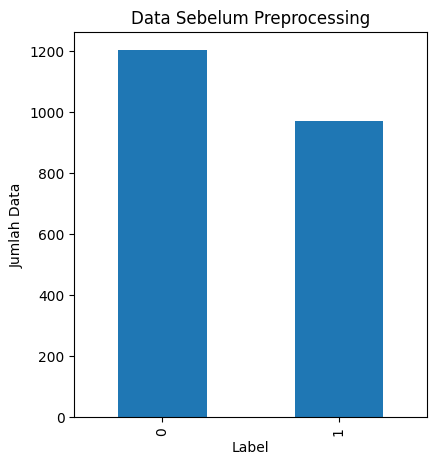

In [ ]:
# Visualisasi data sebelum preprocessing
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Data Sebelum Preprocessing')
df['Label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Jumlah Data')

In [ ]:
# Menggunakan shape untuk melihat jumlah baris (data) dan kolom dalam DataFrame
jumlah_data = df.shape[0]  # Ini akan mengambil jumlah baris, yang merepresentasikan jumlah data

print("Jumlah data dalam dataset:", jumlah_data)

Jumlah data dalam dataset: 2173


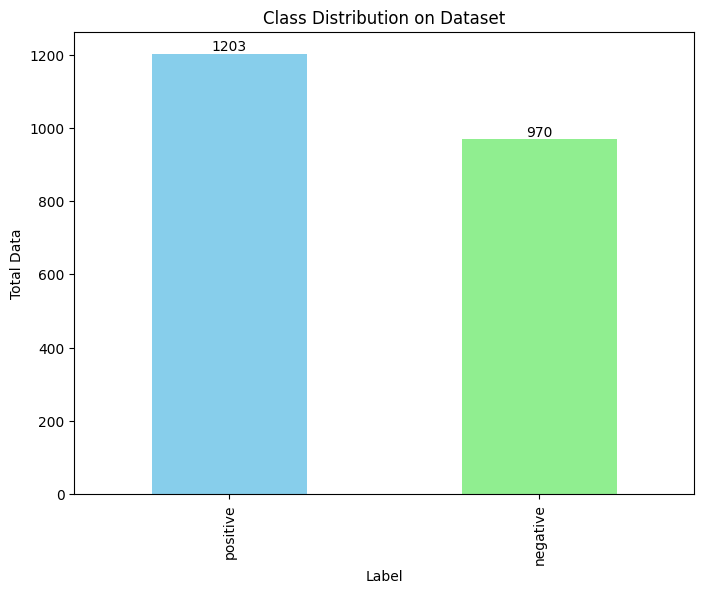

In [ ]:
# Visualisasi distribusi kelas pada dataset
plt.figure(figsize=(8, 6))
plt.title('Class Distribution on Dataset')
counts = df['Label'].value_counts()
counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xlabel('Label')
plt.ylabel('Total Data')

# Menambahkan label jumlah data di atas setiap bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks([0, 1], ['positive', 'negative'])
plt.show()


In [ ]:
# Split data into training and testing sets before Word2Vec
X = np.array(df['Reviews'])
y = np.array(df['Label'])

In [ ]:
# Split data for Word2Vec training (2173 data) and SVM training (1000 data)
X_w2v_train, X_svm, y_w2v_train, y_svm = train_test_split(X, y, test_size=1000, random_state=42)

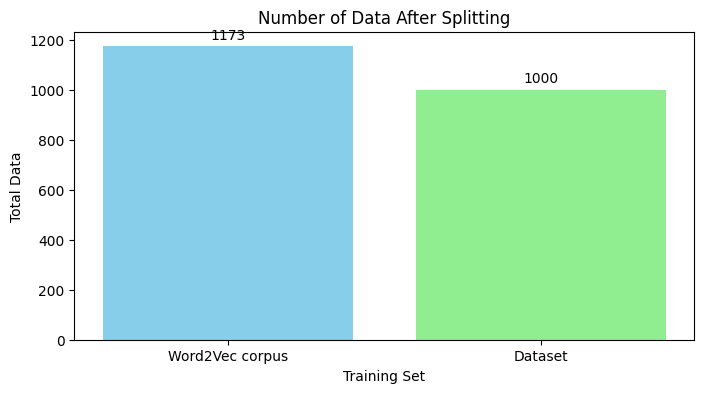

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah data pada masing-masing set
jumlah_data_w2v = len(X_w2v_train)
jumlah_data_svm = len(X_svm)

# Visualisasi jumlah data setelah splitting
plt.figure(figsize=(8, 4))
bars = plt.bar(['Word2Vec corpus', 'Dataset'], [jumlah_data_w2v, jumlah_data_svm], color=['skyblue', 'lightgreen'])
plt.xlabel('Training Set')
plt.ylabel('Total Data')
plt.title('Number of Data After Splitting')

# Menambahkan label jumlah data di samping grafik
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')

plt.show()


In [ ]:
# Tokenization for Word2Vec training data
X_train_tokenized = [tokenize_text(text) for text in X_w2v_train]

In [ ]:
# Word2Vec function
def get_w2v_features(w2v_model, sentence_group):
    feature_vec = np.zeros(w2v_model.vector_size, dtype="float32")
    num_words = 0

    for word in sentence_group:
        if word in w2v_model:
            feature_vec = np.add(feature_vec, w2v_model[word])
            num_words += 1

    if num_words > 0:
        feature_vec = np.divide(feature_vec, num_words)

    return feature_vec

In [ ]:
# Tampilkan vektor kata untuk kata tertentu
word = "jelek"
if word in model_word2vec:
   vector = model_word2vec[word]
   print(f"Vektor untuk kata '{word}':")
   print(vector)
else:
   print(f"Kata '{word}' tidak ditemukan dalam model Word2Vec.")

Vektor untuk kata 'jelek':
[ 0.27840847  0.12754528 -0.51768637  0.07032444 -0.49192122  0.43533292
  0.26461264  0.08231939  0.06421564  0.3065956  -0.01353228  0.06458866
 -0.5761828   0.14296359  0.19047597  0.00385169 -0.08161023 -0.8907825
 -0.07925228 -0.45949125  0.11568233  0.18189159 -0.51796716  0.29429787
 -0.43339443  0.13352759 -0.3910655  -0.34590733  0.02597579  0.4103072
 -0.21019633  0.23041642  0.16799498  0.35820144  0.01674862 -0.43086687
 -0.6340541   0.36911035 -0.45171744  0.1518772   0.13733274 -0.5616427
 -0.09508389 -0.02937373  0.8582857  -0.22478057  0.07298991 -0.03815332
  0.3361878   0.07554724  0.11251504 -0.05983309 -0.28725374  0.04680824
 -0.30812547  0.5769317   1.0669774   0.40186062  0.12894595  0.13554423
  0.31763595 -0.39172173 -0.17482285 -0.36741674  0.1408883   0.24489498
 -0.70963764  0.15859148 -0.19698685  0.34038854  0.3089861  -0.07999726
 -0.62719756  0.3292447   0.54769427  0.27397957 -0.61750597  0.5182006
 -0.1094459  -0.25157538 -0.

In [ ]:
# Tampilkan semua kata dan vektornya
# for word in model_word2vec.vocab: # This line is causing the error
#for word in model_word2vec.key_to_index: # Use key_to_index instead of vocab
#    vector = model_word2vec[word]
#    print(f"Kata: '{word}'")
#    print("Vektor:")
#    print(vector)
#    print("\n")

# Menampilkan w2v dari 10 kata pertama
#n_words_to_display = 10
#for word in model_word2vec.index_to_key[:n_words_to_display]:
#    vector = model_word2vec[word]
#    print(f"Kata: '{word}'")
#    print("Vektor:")
#    print(vector)
#    print("\n")

In [ ]:
# Calculate Word2Vec features for training data
X_train_w2v = [get_w2v_features(model_word2vec, tokens) for tokens in X_train_tokenized]


In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_w2v)

In [ ]:
# Calculate Word2Vec features for training data
X_train_w2v = [get_w2v_features(model_word2vec, tokens) for tokens in X_train_tokenized]
X_train_scaled = scaler.fit_transform(X_train_w2v)


In [ ]:
# Split data for SVM training/testing (800 data for training and 200 data for testing)
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

In [ ]:
# Split data for SVM training/testing (700 data for training and 300 data for testing)
#X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X_svm, y_svm, test_size=0.3, random_state=42)

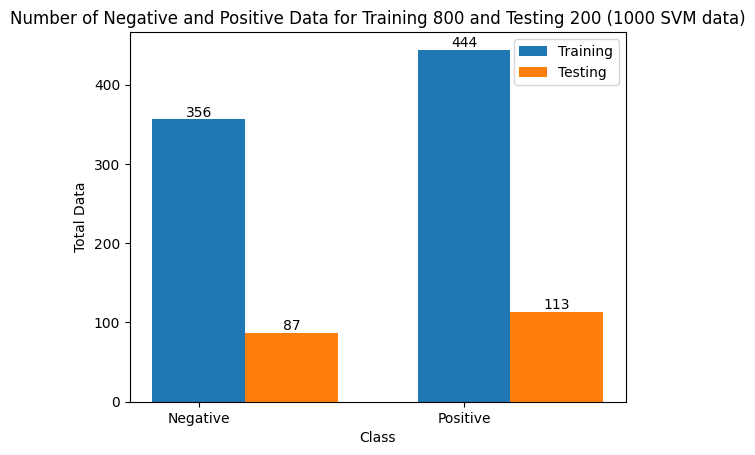

In [ ]:
# Hitung jumlah data kelas 1 dan kelas 0 pada data pelatihan (training)
train_class_1 = np.sum(y_svm[:800] == 1)
train_class_0 = np.sum(y_svm[:800] == 0)

# Hitung jumlah data kelas 1 dan kelas 0 pada data pengujian (testing)
test_class_1 = np.sum(y_svm[800:] == 1)
test_class_0 = np.sum(y_svm[800:] == 0)

# Menyiapkan data untuk ditampilkan pada bar plot
classes = ['Negative', 'Positive']
train_data = [train_class_1, train_class_0]
test_data = [test_class_1, test_class_0]

# Menampilkan bar plot
fig, ax = plt.subplots()
bar_width = 0.35
bar_train = ax.bar(classes, train_data, bar_width, label='Training')
bar_test = ax.bar(np.arange(len(classes)) + bar_width, test_data, bar_width, label='Testing')

# Menambahkan label pada setiap bar
for bar in bar_train:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bar_test:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Menambahkan label pada sumbu x dan y
ax.set_xlabel('Class')
ax.set_ylabel('Total Data')
ax.set_title('Number of Negative and Positive Data for Training 800 and Testing 200 (1000 SVM data)')
ax.legend()

plt.show()


In [ ]:
# Tokenization for SVM testing data
X_test_tokenized = [tokenize_text(text) for text in X_svm_test]

In [ ]:
# Calculate Word2Vec features for testing data
X_test_w2v = [get_w2v_features(model_word2vec, tokens) for tokens in X_test_tokenized]

In [ ]:
# Create an SVM classifier with a polynomial kernel
classifier_poly = SVC(kernel='poly')
classifier_poly.fit(X_train_scaled, y_w2v_train)

SVC(kernel='poly')

In [ ]:
# # Standardize features for testing data
X_test_scaled = scaler.transform(X_test_w2v)

In [ ]:
# Make predictions on the test set
y_pred_poly = classifier_poly.predict(X_test_scaled)

In [ ]:
# Evaluate the classifier
classification_rep = classification_report(y_svm_test, y_pred_poly)

In [ ]:
# # Compute the confusion matrix
confusion_mtx = confusion_matrix(y_svm_test, y_pred_poly)

In [ ]:
print("Confusion Matrix (Polynomial):")
print(confusion_mtx)

print("Classification Report (Polynomial):")
print(classification_rep)

Confusion Matrix (Polynomial):
[[102   4]
 [ 54  40]]
Classification Report (Polynomial):
              precision    recall  f1-score   support

           0       0.65      0.96      0.78       106
           1       0.91      0.43      0.58        94

    accuracy                           0.71       200
   macro avg       0.78      0.69      0.68       200
weighted avg       0.77      0.71      0.69       200



In [ ]:
# Membuat classifier dengan kernel Polynomial
classifier_poly = SVC(kernel='poly')
classifier_poly.fit(X_train_scaled, y_w2v_train)

# Melakukan prediksi pada set pengujian yang sesuai
y_pred_poly = classifier_poly.predict(X_test_scaled)

# Evaluasi classifier
classification_rep_poly = classification_report(y_svm_test, y_pred_poly)

# Mencetak matriks kebingungan (confusion matrix) untuk kernel Polynomial
confusion_mtx_poly = confusion_matrix(y_svm_test, y_pred_poly)

print("Confusion Matrix (Polynomial Kernel):")
print(confusion_mtx_poly)

print("Classification Report (Polynomial Kernel):")
print(classification_rep_poly)


Confusion Matrix (Polynomial Kernel):
[[102   4]
 [ 54  40]]
Classification Report (Polynomial Kernel):
              precision    recall  f1-score   support

           0       0.65      0.96      0.78       106
           1       0.91      0.43      0.58        94

    accuracy                           0.71       200
   macro avg       0.78      0.69      0.68       200
weighted avg       0.77      0.71      0.69       200



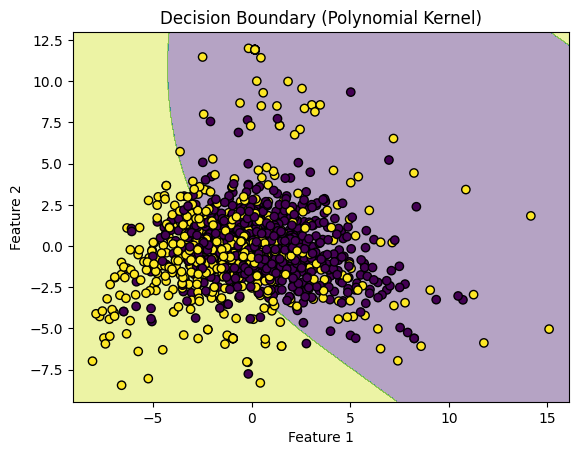

In [ ]:
# prompt: bikinkan visualisasi hasil kernel polynomial menggunakan decision boundary

import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np

# Assuming X_train_scaled, y_w2v_train, and X_test_scaled are already defined from your previous code

# Create an SVM classifier with a polynomial kernel (example)
classifier_poly = SVC(kernel='poly', degree=3, coef0=1, C=1) # Adjust parameters as needed
classifier_poly.fit(X_train_scaled, y_w2v_train)


# Function to plot decision boundaries (you'll need to adapt this to your data dimensions)
def plot_decision_boundary(clf, X, y, pca):
  # Create meshgrid for plotting
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                       np.arange(y_min, y_max, 0.02))

  # Predict class for each point in the mesh
  # Transform the meshgrid to the original feature space
  mesh_points = np.c_[xx.ravel(), yy.ravel()]
  mesh_points_original = pca.inverse_transform(mesh_points)
  Z = clf.predict(mesh_points_original)
  Z = Z.reshape(xx.shape)

  # Plot the contour and training data
  plt.contourf(xx, yy, Z, alpha=0.4)
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
  plt.xlabel('Feature 1')  # Update with your feature names
  plt.ylabel('Feature 2')  # Update with your feature names
  plt.title('Decision Boundary (Polynomial Kernel)')
  plt.show()



# Example using PCA to reduce to 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

# Pass the PCA object to the plotting function
plot_decision_boundary(classifier_poly, X_train_2d, y_w2v_train, pca)

In [ ]:
# Membuat classifier dengan kernel RBF
classifier_rbf = SVC(kernel='rbf')
classifier_rbf.fit(X_train_scaled, y_w2v_train)

# Melakukan prediksi pada set pengujian yang sesuai
y_pred_rbf = classifier_rbf.predict(X_test_w2v)  # Menggunakan X_test_w2v bukan X_test_scaled

# Mencetak matriks kebingungan (confusion matrix) untuk kernel RBF
confusion_mtx_rbf = confusion_matrix(y_svm_test, y_pred_rbf)

print("Confusion Matrix (RBF Kernel):")
print(confusion_mtx_rbf)

# Evaluasi classifier
classification_rep_rbf = classification_report(y_svm_test, y_pred_rbf)

print("Classification Report (RBF Kernel):")
print(classification_rep_rbf)


Confusion Matrix (RBF Kernel):
[[103   3]
 [ 61  33]]
Classification Report (RBF Kernel):
              precision    recall  f1-score   support

           0       0.63      0.97      0.76       106
           1       0.92      0.35      0.51        94

    accuracy                           0.68       200
   macro avg       0.77      0.66      0.64       200
weighted avg       0.76      0.68      0.64       200



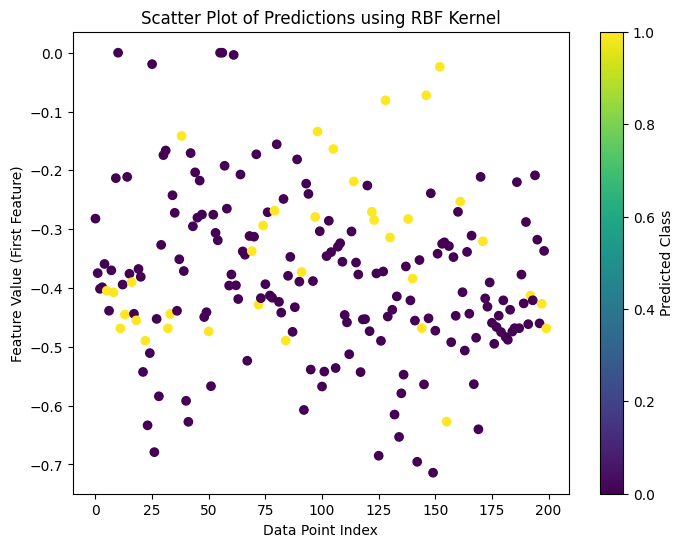

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create the scatter plot
plt.figure(figsize=(8, 6))
# Convert X_test_w2v to a NumPy array if it's a list of arrays
X_test_w2v_array = np.array(X_test_w2v)
# Access the first feature using correct indexing
plt.scatter(range(len(X_test_w2v_array)), X_test_w2v_array[:, 0], c=y_pred_rbf, cmap='viridis')
plt.xlabel("Data Point Index")
plt.ylabel("Feature Value (First Feature)")
plt.title("Scatter Plot of Predictions using RBF Kernel")
plt.colorbar(label="Predicted Class")
plt.show()

In [ ]:
# Membuat classifier dengan kernel Sigmoid
classifier_sigmoid = SVC(kernel='sigmoid')
classifier_sigmoid.fit(X_train_scaled, y_w2v_train)

# Melakukan prediksi pada set pengujian yang sesuai
y_pred_sigmoid = classifier_sigmoid.predict(X_test_w2v)  # Menggunakan X_test_w2v bukan X_test_scaled

# Mencetak matriks kebingungan (confusion matrix) untuk kernel Sigmoid
confusion_mtx_sigmoid = confusion_matrix(y_svm_test, y_pred_sigmoid)

print("Confusion Matrix (Sigmoid Kernel):")
print(confusion_mtx_sigmoid)

# Evaluasi classifier
classification_rep_sigmoid = classification_report(y_svm_test, y_pred_sigmoid)

print("Classification Report (Sigmoid Kernel):")
print(classification_rep_sigmoid)


Confusion Matrix (Sigmoid Kernel):
[[106   0]
 [ 91   3]]
Classification Report (Sigmoid Kernel):
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       106
           1       1.00      0.03      0.06        94

    accuracy                           0.55       200
   macro avg       0.77      0.52      0.38       200
weighted avg       0.76      0.55      0.40       200



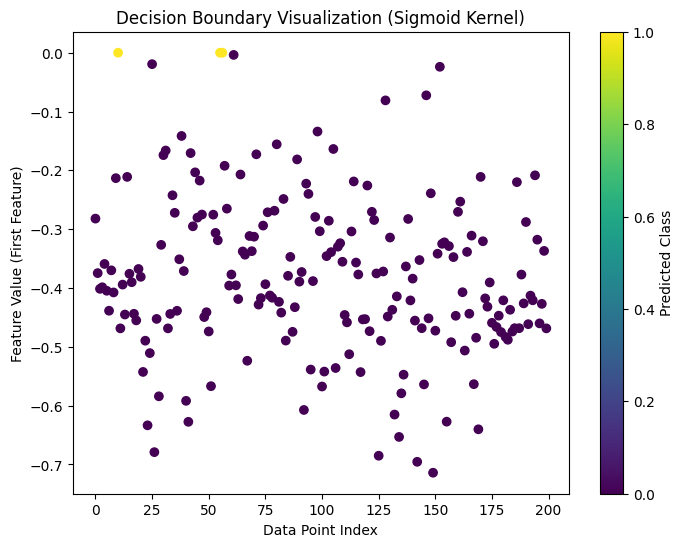

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Convert X_test_w2v to a NumPy array if it's a list of arrays
X_test_w2v_array = np.array(X_test_w2v)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(range(len(X_test_w2v_array)), X_test_w2v_array[:, 0], c=y_pred_sigmoid, cmap='viridis')
plt.xlabel("Data Point Index")
plt.ylabel("Feature Value (First Feature)")
plt.title("Decision Boundary Visualization (Sigmoid Kernel)")
plt.colorbar(label="Predicted Class")
plt.show()


In [ ]:
# Membuat classifier dengan kernel Linear
classifier_linear = SVC(kernel='linear')
classifier_linear.fit(X_train_scaled, y_w2v_train)

# Standardize fitur untuk data pengujian
X_test_scaled = scaler.transform(X_test_w2v)

# Melakukan prediksi pada set pengujian yang sesuai
y_pred_linear = classifier_linear.predict(X_test_scaled)

# Mencetak matriks kebingungan (confusion matrix) untuk kernel Linear
confusion_mtx_linear = confusion_matrix(y_svm_test, y_pred_linear)

print("Confusion Matrix (Linear Kernel):")
print(confusion_mtx_linear)

# Evaluasi classifier
classification_rep_linear = classification_report(y_svm_test, y_pred_linear)

print("Classification Report (Linear Kernel):")
print(classification_rep_linear)


Confusion Matrix (Linear Kernel):
[[95 11]
 [24 70]]
Classification Report (Linear Kernel):
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       106
           1       0.86      0.74      0.80        94

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



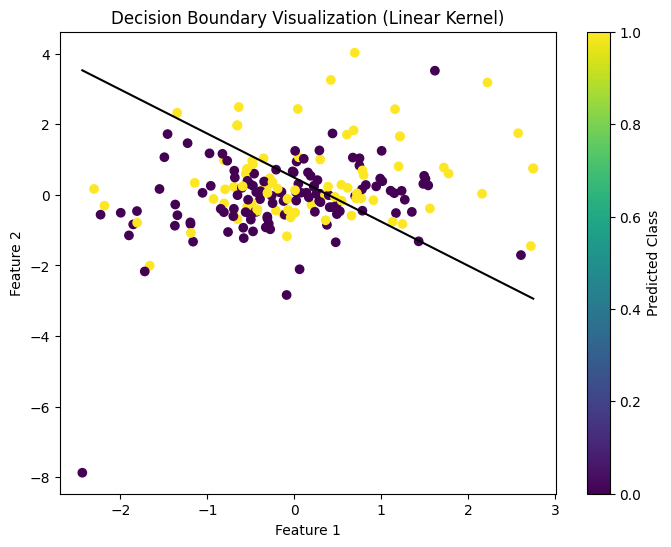

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Assuming X_test_scaled and y_pred_linear are already defined

# Create the scatter plot
plt.figure(figsize=(8, 6))

# Convert X_test_scaled to a NumPy array if it's a list of arrays
X_test_scaled_array = np.array(X_test_scaled)

plt.scatter(X_test_scaled_array[:, 0], X_test_scaled_array[:, 1], c=y_pred_linear, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary Visualization (Linear Kernel)")
plt.colorbar(label="Predicted Class")

w = classifier_linear.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(min(X_test_scaled_array[:, 0]), max(X_test_scaled_array[:, 0]))
yy = a * xx - (classifier_linear.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-')


plt.show()
